<a href="https://colab.research.google.com/github/queenakki/AI-ML/blob/main/adultnit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the income based on the age using Logistic Regression**

**importing libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

**Mounting the drive**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df=pd.read_csv("/content/drive/MyDrive/adult.csv")
df.head()

,Age,work class,fln,education num,ed_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,house/week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**satistical information**

In [38]:
df.shape

(32561, 15)

In [ ]:
df.isnull().sum()

Age               0
work class        0
fln               0
education num     0
ed_num            0
maritalstatus     0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
house/week        0
native_country    0
income            0
dtype: int64

In [ ]:
df.dtypes

Age                int64
work class        object
fln                int64
education num     object
ed_num             int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
house/week         int64
native_country    object
income            object
dtype: object

In [ ]:
df.columns

Index(['Age', 'work class', 'fln', 'education num', 'ed_num', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'house/week', 'native_country', 'income'],
      dtype='object')

**charts**

In [ ]:
r1=df['sex'].value_counts()
r1

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
r2=df['maritalstatus'].value_counts()
r2

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

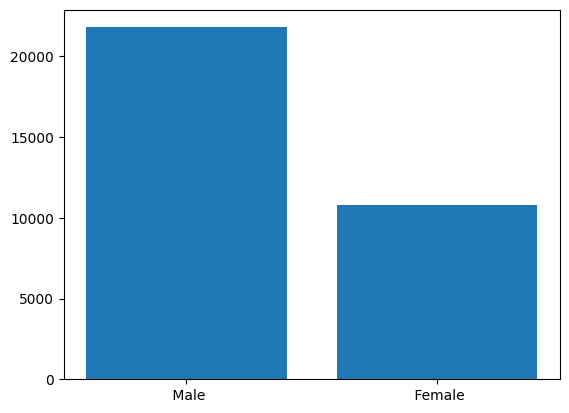

In [ ]:
mpl.bar(r1.index,r1.values)
mpl.show()

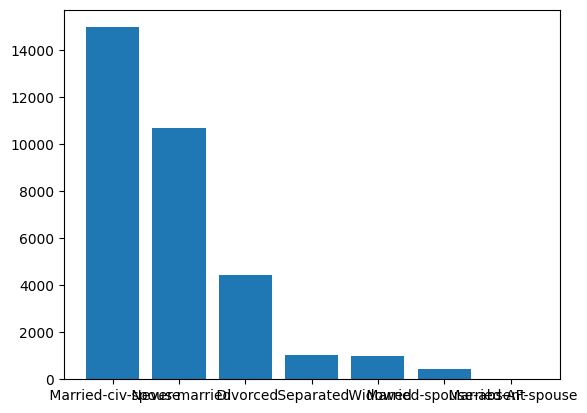

In [ ]:
mpl.bar(r2.index,r2.values)
mpl.show()

In [ ]:
r3=df['income'].value_counts()
r3

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

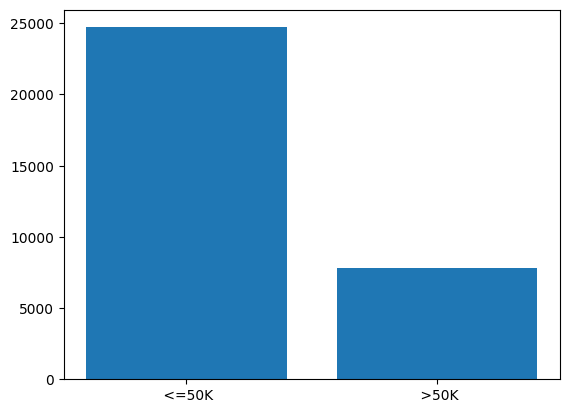

In [ ]:
mpl.bar(r3.index,r3.values)
mpl.show()

**categorical conversion**

In [ ]:
status = pd.get_dummies(df['sex'], drop_first = True)
#status1 = pd.get_dummies(df['income'], drop_first = True)
# Adding the status to the original housing dataframe
adult1 = pd.concat([df, status], axis = 1)
#adult2 = pd.concat([df, status1], axis = 1)
# Dropping 'furnishingstatus' as we have created the dummies for it
df.drop(['sex'], axis = 1, inplace = True)
#df.drop(['income'], axis = 1, inplace = True)

adult1

,Age,work class,fln,education num,ed_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,house/week,native_country,income,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


**droping the invalid columns**

In [ ]:
df.drop(['maritalstatus','work class','education num','ed_num','relationship','occupation','race','native_country'], axis = 1, inplace = True)

In [ ]:
df

,Age,fln,capital_gain,capital_loss,house/week,income
0,39,77516,2174,0,40,<=50K
1,50,83311,0,0,13,<=50K
2,38,215646,0,0,40,<=50K
3,53,234721,0,0,40,<=50K
4,28,338409,0,0,40,<=50K
...,...,...,...,...,...,...
32556,27,257302,0,0,38,<=50K
32557,40,154374,0,0,40,>50K
32558,58,151910,0,0,40,<=50K
32559,22,201490,0,0,20,<=50K


**dataframe and series**

In [ ]:
x=df.drop('income',axis=1)
y=df['income']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32561, 5)
(32561,)


**splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 5)
(6513, 5)
(26048,)
(6513,)


**confusion matrices error**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def eval_model(y_test,ypred):
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print('accuracy score',accuracy_score(y_test,ypred))
  print(classification_report(y_test,ypred))
def mscore(model):
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
m3=LogisticRegression(max_iter=10000)
m3.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
mscore(m3)

training score 0.7974892506142506
testing score 0.798710271764164


In [ ]:
ypred_m3=m3.predict(x_test)
eval_model(y_test,ypred_m3)

[[4775  176]
 [1135  427]]
accuracy score 0.798710271764164
              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      4951
        >50K       0.71      0.27      0.39      1562

    accuracy                           0.80      6513
   macro avg       0.76      0.62      0.64      6513
weighted avg       0.78      0.80      0.76      6513



**Generating confusion matrix and classification report**

In [ ]:
def gen_model(model,x_test,x_train,y_test,y_train):
  model.fit(x_train,y_train)
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))
  ypred=model.predict(x_test,y_test)
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print(classification_report(y_test,ypred))

In [ ]:
print(ypred_m3.shape)

(6513,)


In [ ]:
x_test.columns

Index(['Age', 'fln', 'capital_gain', 'capital_loss', 'house/week'], dtype='object')

**predicting the income**

In [ ]:
submission_test=pd.DataFrame({'Test_Age':x_test['Age'],'pred_income':ypred_m3})
submission_test.head(100)

,Test_Age,pred_income
1203,44,<=50K
6022,51,<=50K
14984,23,<=50K
3410,42,<=50K
17613,51,<=50K
...,...,...
7352,18,<=50K
16054,42,<=50K
1289,50,<=50K
13094,34,<=50K
